# Ant-Colony-Optimization Problem

This Jupyter Notebook deals with Ant-Colony-Optimization. All information is taken from Daniel Merkle's and Martin Middendorf's Chapter 14 on Swarm Intelligence in Search Methodologies. Introductory Tutorials in Optimization and Decision Support Techniques by Edmund K. Burke and Graham Kendall.

Ant-Colony Optimization is one of two main areas of Swarm Intelligence. It is used to solve optimization and search problems. The idea is that ant colonies find the shortest way form their nest to the food source with the help of pheromones. Experiments have shown that if you connect the nest with two different branches to a food source - one way is longer than the other one, ants will quickly find out which way is the shortest one. The result is an ant trail.

How exactly does it work? At the beginning both branches are taken with the same probability. After a while the pheromone concentration will be higher at the shorter branch since the ants are back at the nest way faster if they have taken the short road. The pheromone concentration gets higher more easily and since ants are taking the road with a higher pheromone concentration, eventually all ants take the short road

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Initialization
Importing .txt files and saving them as arrays.

In [2]:
def initialize(filepath): 
    with open(filepath, 'r') as t:
        distance_matrix = []
        for line in t.readlines():
            y = [int(value) for value in line.split()]
            distance_matrix.append(y)
        
        t.close()
        distance_matrix = np.array(distance_matrix)
    
    return distance_matrix

## 2. Solution Construction

In [49]:
def solution_construction(distance_matrix, pheromone_matrix, number_ants,alpha,beta):
    ant_number = 0
    len_distance_matrix = len(distance_matrix)
    range_distance_matrix = np.arange(len(distance_matrix))
    
    # creating a solution matrix corresponding to the size of the distance_matrix
    solution_matrix = np.zeros(shape=(number_ants, len_distance_matrix), dtype='int')
    
    # do for each ant
    while ant_number < number_ants:
        # initialize selection_set, append a placeholder '1' for each city available           
        selection_set = np.ones(len(distance_matrix))
        
        # choose a random starting city, save it in the solution matrix and set it to '0' in selection_set
        start = (np.random.random_integers(0, len_distance_matrix-1))
        solution_matrix[ant_number, 0] = start
        selection_set[start] = 0
        
        # iterating through all cities until no one is left "one ant"
        for x in np.arange(len_distance_matrix-1):
            probability = np.zeros((len_distance_matrix))
                
            # create probability matrix of size of distance_matrix    
            cities_left = np.where(selection_set != 0)[0]
            for i in cities_left:
                city_before = solution_matrix[ant_number, x]

                t = (pheromone_matrix[city_before][i])**alpha
                n = (1/(distance_matrix[city_before][i]))**beta 

                pheromones_city_before = pheromone_matrix[city_before]
                distances_city_before = distance_matrix[city_before]
                
                pheromones_city_before = pheromones_city_before[selection_set!=0]
                distances_city_before = distances_city_before[selection_set!=0]

                total_sum = np.sum((pheromones_city_before)**alpha * (1/distances_city_before))**beta

                probability[i] = (t * n)/total_sum

            boundaries = np.zeros((len_distance_matrix))
            boundaries[0] = probability[0]
 
            # calculation of boundaries for roulette-wheel-like selection of next city
            for i in np.arange(1, len_distance_matrix):
                boundaries[i] = probability[i]+boundaries[i-1]
            
            # selection of the next city
            rand_mate = np.random.uniform(0,1)
            for m in range(len_distance_matrix):
                if rand_mate == 1:
                    city = len_distance_matrix
                    break
                elif boundaries[m] > rand_mate:
                    city = m
                    break
            solution_matrix[ant_number, x+1] = city
            selection_set[m] = 0
        ant_number += 1
    return solution_matrix

In [50]:
def solution_construction_both1(distance_matrix, pheromone_matrix, number_ants):
    ant_number = 0
    len_distance_matrix = len(distance_matrix)
    range_distance_matrix = np.arange(len(distance_matrix))
    
    # creating a solution matrix corresponding to the size of the distance_matrix
    solution_matrix = np.zeros(shape=(number_ants, len_distance_matrix), dtype='int')
    
    # do for each ant
    while ant_number < number_ants:
        # initialize selection_set, append a placeholder '1' for each city available           
        selection_set = np.ones(len(distance_matrix))
        
        # choose a random starting city, save it in the solution matrix and set it to '0' in selection_set
        start = (np.random.random_integers(0, len_distance_matrix-1))
        solution_matrix[ant_number, 0] = start
        selection_set[start] = 0
        
        # iterating through all cities until no one is left "one ant"
        for x in np.arange(len_distance_matrix-1):
            probability = np.zeros((len_distance_matrix))
                
            # create probability matrix of size of distance_matrix    
            cities_left = np.where(selection_set != 0)[0]
            for i in cities_left:
                city_before = solution_matrix[ant_number, x]

                t = (pheromone_matrix[city_before][i])
                n = (1/(distance_matrix[city_before][i])) 

                pheromones_city_before = pheromone_matrix[city_before]
                distances_city_before = distance_matrix[city_before]
                
                pheromones_city_before = pheromones_city_before[selection_set!=0]
                distances_city_before = distances_city_before[selection_set!=0]

                total_sum = np.sum((pheromones_city_before) * (1/distances_city_before))

                probability[i] = (t * n)/total_sum

            boundaries = np.zeros((len_distance_matrix))
            boundaries[0] = probability[0]
 
            # calculation of boundaries for roulette-wheel-like selection of next city
            for i in np.arange(1, len_distance_matrix):
                boundaries[i] = probability[i]+boundaries[i-1]
            
            # selection of the next city
            rand_mate = np.random.uniform(0,1)
            for m in range(len_distance_matrix):
                if rand_mate == 1:
                    city = len_distance_matrix
                    break
                elif boundaries[m] > rand_mate:
                    city = m
                    break
            solution_matrix[ant_number, x+1] = city
            selection_set[m] = 0
        ant_number += 1
    return solution_matrix

In [29]:
def solution_construction_withoutbeta(distance_matrix, pheromone_matrix, number_ants):
    
    ant_number = 0
    len_distance_matrix = len(distance_matrix)
    range_distance_matrix = np.arange(len(distance_matrix))
    
    # creating a solution matrix corresponding to the size of the distance_matrix
    solution_matrix = np.zeros(shape=(number_ants, len_distance_matrix), dtype='int')
    
    # do for each ant
    while ant_number < number_ants:
        # initialize selection_set, append a placeholder '1' for each city available           
        selection_set = np.ones(len(distance_matrix))
        
        # choose a random starting city, save it in the solution matrix and set it to '0' in selection_set
        start = (np.random.random_integers(0, len_distance_matrix-1))
        solution_matrix[ant_number, 0] = start
        selection_set[start] = 0
        
        # iterating through all cities until no one is left "one ant"
        for x in np.arange(len_distance_matrix-1):
            probability = np.zeros((len_distance_matrix))
                
            # create probability matrix of size of distance_matrix    
            cities_left = np.where(selection_set != 0)[0]
            for i in cities_left:
                city_before = solution_matrix[ant_number, x]

                t = (pheromone_matrix[city_before][i])

                pheromones_city_before_mask = pheromone_matrix[city_before]
                pheromones_city_left = pheromones_city_before_mask[selection_set!=0] 

                total_sum = np.sum((pheromones_city_left))

                probability[i] = (t)/total_sum

            boundaries = np.zeros((len_distance_matrix))
            boundaries[0] = probability[0]
 
            # calculation of boundaries for roulette-wheel-like selection of next city
            for i in np.arange(1, len_distance_matrix):
                boundaries[i] = probability[i]+boundaries[i-1]
            
            # selection of the next city
            rand_mate = np.random.uniform(0,1)
            for m in range(len_distance_matrix):
                if rand_mate == float(1):
                    city = len_distance_matrix
                    break
                elif boundaries[m] > rand_mate:
                    city = m
                    break
            solution_matrix[ant_number, x+1] = city
            selection_set[m] = 0
        ant_number += 1
    return solution_matrix

## 3. Evaporation

In [7]:
def evaporate(pheromone_matrix,evaporator):
    pheromone_matrix = pheromone_matrix * evaporator

    return pheromone_matrix

## 4. Intensification

solution_matrix will be a list of lists which each holding the numbers of the cities in the order that  each of the ants visited them


In [8]:
def get_best_solution(distance_matrix, solution_matrix):
    shortest_distance = 10000000000
    for i in solution_matrix:
        distance = 0
       
       
        for j in range(len(i)):
            y=i[j]
            if j < len(i)-1: 
                distance = distance + distance_matrix[y][i[j+1]]
            else:
                distance= distance + distance_matrix[i[j]][i[0]]
         
        
        if distance < shortest_distance:
            shortest_distance = distance
            best_solution = i
            #print(best_solution)
    return best_solution, shortest_distance

In [9]:
array2=[[1, 1, 1],[1, 1, 1],[1, 1, 1]]
array3=[[1, 2, 0],[0, 2, 1]]
array0=[[0, 4, 1],[1, 0, 5],[4, 1, 0]]

def intensification(distance_matrix, pheromone_matrix, solution_matrix,intensifier):
      
    best_solution, shortest_distance = get_best_solution(distance_matrix, solution_matrix)
   
    for k in range(len(best_solution)):  
        x = best_solution[k]
        if k < len(best_solution)-1: 
            pheromone_matrix[x][best_solution[k+1]]= pheromone_matrix[x][best_solution[k+1]]*intensifier
        else:
            pheromone_matrix[best_solution[k]][0]= pheromone_matrix[best_solution[k]][0]*intensifier
   
    return pheromone_matrix
            
print(intensification(array0,array2,array3,1.05))

[[1, 1, 1.05], [1.05, 1, 1], [1, 1.05, 1]]


## Action

In [58]:
# Choose the city matrix: '01_tsp.txt', '02_tsp.txt', '03_tsp.txt'
filepath = '01_tsp.txt'
distance_matrix = initialize(filepath)

# Set up pheromone matrix with shape 150 x 150 and fixed values = 0.01
pheromone_matrix = np.full(distance_matrix.shape, 0.01)

# Set number of ants
number_ants = 20

# Set alpha and beta (test: alpha = 1, beta = 0 AND alpha = 1, beta = 0)
alpha = 1
beta = 1

intensifier = 1.60
evaporator = 0.80

%timeit
best_solution_list = []
# "Measure" convergence
converged = False
count = 0
totalCount = 0

while not converged: 
    # solution_paths store the order how each ant visited the cities (each row is one ant)
    if alpha == 1 and beta == 1:
        solution_matrix = solution_construction_both1(distance_matrix, pheromone_matrix, number_ants)
    elif alpha == 1 and beta == 0:
        solution_matrix = solution_construction_withoutbeta(distance_matrix, pheromone_matrix, number_ants)
    else:
        solution_matrix = solution_construction(distance_matrix, pheromone_matrix, number_ants, alpha, beta)
    
    # Set up new pheromone matrix
    pheromone_matrix = evaporate(pheromone_matrix,evaporator)

    # Intensify good solutions and store them in a new pheromone matrix
    pheromone_matrix = intensification(distance_matrix, pheromone_matrix, solution_matrix,intensifier)
        
    # Convergence-Criterium:
    best_solution, shortest_distance = get_best_solution(distance_matrix, solution_matrix)
    best_solution_list.append(shortest_distance)
    if count == 10:
    # if best_solution did not change, the algorithm converged, otherwise we reset the count value
        print("best solution",shortest_distance)
        if best_solution_first == shortest_distance:
            converged = True
        else:
            count = 0
    # store the first best_solution for convergence-comparison
    elif count == 0:
        best_solution_first = shortest_distance
        count += 1
    else:
    # increase count
        count += 1
    totalCount += 1
    print("totalCount",totalCount)
print("done!")

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(0, 149 + 1) instead
  from ipykernel import kernelapp as app


totalCount 1
totalCount 2
totalCount 3
totalCount 4
totalCount 5
totalCount 6
totalCount 7
totalCount 8
totalCount 9
totalCount 10
best solution 16878
totalCount 11
totalCount 12
totalCount 13
totalCount 14
totalCount 15
totalCount 16
totalCount 17
totalCount 18
totalCount 19
totalCount 20
totalCount 21
best solution 16300
totalCount 22
totalCount 23
totalCount 24
totalCount 25
totalCount 26
totalCount 27
totalCount 28
totalCount 29
totalCount 30
totalCount 31
totalCount 32
best solution 13926
totalCount 33
totalCount 34
totalCount 35
totalCount 36
totalCount 37
totalCount 38
totalCount 39
totalCount 40
totalCount 41
totalCount 42
totalCount 43
best solution 11212
totalCount 44
totalCount 45
totalCount 46
totalCount 47
totalCount 48
totalCount 49
totalCount 50
totalCount 51
totalCount 52
totalCount 53
totalCount 54
best solution 10370
totalCount 55
totalCount 56
totalCount 57
totalCount 58
totalCount 59
totalCount 60
totalCount 61
totalCount 62
totalCount 63
totalCount 64
totalCount 65

KeyboardInterrupt: 

## Plot

In [63]:
def simple_plot(shortest_distance_per_run,tsp_number,ant_number,alpha,beta,intensificator,evaporator):
    fig, ax = plt.subplots(figsize=plt.figaspect(0.2))
    ax.plot(shortest_distance_per_run, ':r', label=f"α = {alpha}, β = {beta}")
    ax.set(ylabel='Distance', xlabel='Run', title='ACO on TSP')
    ax.legend()
    plt.show()
    fig.savefig(f"plots/tsp{tsp_number}_Ants{ant_number}_Aplha{alpha}_Beta{beta}_inten{intensificator}_evap{evaporator}.png")

Best solution in this run:  5694


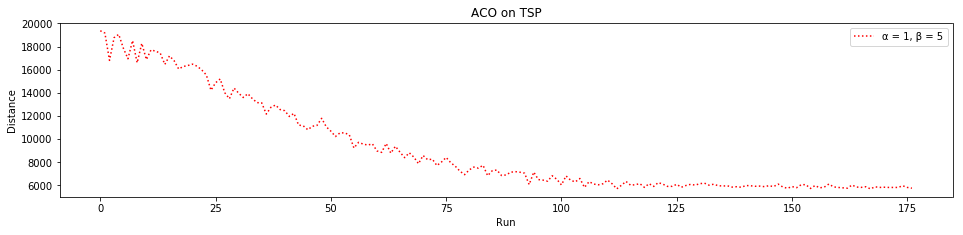

In [66]:
shortest_distance_per_run = best_solution_list
tsp_number_for_plot = "01"
ant_number_for_plot = 20
alpha_for_plot = 1
beta_for_plot = 5
intensificator_for_plot = "160"
evaporator_for_plot = "080"


print("Best solution in this run: ",min(shortest_distance_per_run_1))
simple_plot(shortest_distance_per_run,tsp_number_for_plot,ant_number_for_plot,alpha_for_plot,beta_for_plot,intensificator_for_plot,evaporator_for_plot)